<a href="https://colab.research.google.com/github/jcardonamde/TopCountriesMilitarySpending/blob/main/02_Ejercicio_visualizaci%C3%B3n_de_datos(pr%C3%A1ctica).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio de visualización de datos (práctica)**

[Makeover Monday](https://www.makeovermonday.co.uk/) ofrece un desafío semanal para reconstruir o mejorar la visualización de datos. La tarea es elegir una de las visualizaciones de datos para reconstruir o mejorarlas.

Para hacer esto:

1. Elijan un conjunto de datos de la [lista de conjuntos de datos](https://www.makeovermonday.co.uk/data/data-sets-2020/). Pueden elegir un conjunto de datos reciente o uno de un año anterior (siempre y cuando les interese).
2. Descarguen los datos que eligieron.
3. Usen Python para crear una visualización atractiva e informativa usando los datos que seleccionaron.

También deben colocar su trabajo para esta tarea en GitHub, para que así todos puedan ver la increíble visualización que crearon.

<br>

**Para hacer esto:**

1. Creen un nuevo repositorio GitHub con un nombre informativo para la visualización o los datos. (Nota: aquí están las instrucciones en cómo hacerlo si no están seguros. Asegúrense de marcar la casilla “Inicializar este repositorio con un README”).
2. Agreguen el código al repositorio GitHub que crearon. Pueden hacerlo en Google Colab seleccionando Archivo > “Guardar una copia en GitHub”
3. Editen el README para crear una descripción informativa del ejercicio que explica el propósito de la tarea/visualización, los datos y lo que la visualización que han hecho les muestra/indica. Incluso puede que quieran incluir una imagen estática de la visualización final en README también. (Nota: README son archivos Markdown. [Aquí](https://www.markdownguide.org/cheat-sheet) están los apuntes de una sintaxis de Markdown). Intenten hacer de esto lo más informativo y profesional, ya que esto es lo primero que las personas verán cuando entren a sus repositorios de GitHub.


In [173]:
# Importar bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [174]:
# Importamos nuestro dataset para iniciar la exploración
filename = ('/content/drive/MyDrive/Colab Notebooks/Codificación de Dojo/Semana04/Datasets/SIPRIMilitaryExpenditureDatabase.xlsx')
df = pd.read_excel(filename)
df.head()

,Year,Country,Spending (2020 USD),Percent of GDP,Percent of Government Spending,Spending per Capita
0,1988,Afghanistan,NaN,NaN,NaN,NaN
1,1989,Afghanistan,NaN,NaN,NaN,NaN
2,1990,Afghanistan,NaN,NaN,NaN,NaN
3,1991,Afghanistan,NaN,NaN,NaN,NaN
4,1992,Afghanistan,NaN,NaN,NaN,NaN


In [175]:
# Revisamos el número de valores que se tienen por Columna y su tipo de Dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5882 entries, 0 to 5881
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            5882 non-null   int64  
 1   Country                         5882 non-null   object 
 2   Spending (2020 USD)             4863 non-null   float64
 3   Percent of GDP                  4881 non-null   float64
 4   Percent of Government Spending  4210 non-null   float64
 5   Spending per Capita             4835 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 275.8+ KB


In [176]:
# Inicialmente verificamos si en el dataframe tenemos datos duplicados. 
# Por lo que usamos el método Duplicated junto al de Sum para obtener la cantidad de datos que se repiten.
df.duplicated()
df.duplicated().sum()

0

In [177]:
# Examino el número de valores unicos entre las columnas con las cuales estamos trabajando
df.nunique()

Year                                34
Country                            173
Spending (2020 USD)               4863
Percent of GDP                    4881
Percent of Government Spending    4209
Spending per Capita               4835
dtype: int64

In [178]:
# Hago un conteo de valores por la Columna Country para tener una idea base de la cantidad de registros por Pais
df['Country'].value_counts()

Afghanistan    34
Pakistan       34
Netherlands    34
New Zealand    34
Nicaragua      34
               ..
Germany        34
Ghana          34
Greece         34
Guatemala      34
Zimbabwe       34
Name: Country, Length: 173, dtype: int64

In [179]:
# Valido en que columnas se centran la mayoria de valores de tipo Na
df.isna().sum()

Year                                 0
Country                              0
Spending (2020 USD)               1019
Percent of GDP                    1001
Percent of Government Spending    1672
Spending per Capita               1047
dtype: int64

In [180]:
# Hago un validación directo en el DataFrame y he percibido que la mayoria de datos tipo Na estan relacionados a registros de hace de más de 10 años
# Que no tienen tanta relación para el tipo de análisis que quiero hacer, está más orientado a verificar los últimos 5 años de como se han movido los gastos en armamento de las principales potencias
df.isna()

,Year,Country,Spending (2020 USD),Percent of GDP,Percent of Government Spending,Spending per Capita
0,False,False,True,True,True,True
1,False,False,True,True,True,True
2,False,False,True,True,True,True
3,False,False,True,True,True,True
4,False,False,True,True,True,True
...,...,...,...,...,...,...
5877,False,False,False,False,False,False
5878,False,False,False,False,False,False
5879,False,False,False,False,False,False
5880,False,False,False,False,False,False


In [181]:
# Se depuran filas con valores vacios
df.dropna(inplace=True)

In [182]:
# Verificamos el estado actual de nuestro dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4181 entries, 16 to 5881
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            4181 non-null   int64  
 1   Country                         4181 non-null   object 
 2   Spending (2020 USD)             4181 non-null   float64
 3   Percent of GDP                  4181 non-null   float64
 4   Percent of Government Spending  4181 non-null   float64
 5   Spending per Capita             4181 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 228.6+ KB


In [183]:
# Constantamos que ya no tenemos incluidos aún valores tipo No Disponibles (Na)
df.isna().sum()

Year                              0
Country                           0
Spending (2020 USD)               0
Percent of GDP                    0
Percent of Government Spending    0
Spending per Capita               0
dtype: int64

In [184]:
# Identificamos los valores estadísticos para encontrar referencia de valores máximos y de promedio para tener una referencia de rangos para el análisis
df.describe()

,Year,Spending (2020 USD),Percent of GDP,Percent of Government Spending,Spending per Capita
count,4181.000000,4181.000000,4181.000000,4181.000000,4181.000000
mean,2006.835207,9860.085928,0.022432,0.082151,237.018579
std,8.916002,53738.966493,0.028892,0.144095,406.684043
min,1988.000000,0.861989,0.000054,0.000672,0.496066
25%,2000.000000,154.002827,0.011004,0.033415,15.203962
50%,2007.000000,934.311154,0.016293,0.055771,68.976635
75%,2014.000000,4537.007636,0.025682,0.100706,294.217993
max,2021.000000,875941.836165,1.173498,5.816547,6363.553898




---



# **1) 1er Análisis**

Quiero identificar inicialmente cuáles son los 20 países que han realizado mayor gasto acumulativo per cápita desde 1988 hasta el año 2021

In [185]:
# Genero un filtro de la columna Spending per Capita de todos los valores que estan por encima del promedio
# Posteriormente asocio a una variable el dataframe donde en filas va tener los valores de busqueda del filtro inicial agrupado por Pais y Spendig per Capita
# Ordenandolos de mayor a menor desde el valor máximo del filtrado y mostrando los primeros 20 Pais con mayor Spendig per Capita
SpC_Filter = df['Spending per Capita'] >= 237.018579
top20SPC = df.loc[SpC_Filter, :].groupby(['Country'])['Spending per Capita'].max().sort_values(ascending = False).head(20)
top20SPC

Country
Kuwait                      6363.553898
Qatar                       3955.444078
Israel                      2769.167183
Saudi Arabia                2748.781974
Oman                        2644.554087
United Arab Emirates        2561.541851
United States of America    2414.398685
Singapore                   1884.911002
Norway                      1509.644441
Brunei                      1287.280928
Australia                   1231.336909
United Kingdom              1195.151444
Bahrain                     1104.240986
Finland                     1064.077230
Korea, South                 978.987406
Greece                       971.014525
Denmark                      927.442177
France                       902.442406
Netherlands                  800.792547
Sweden                       776.314968
Name: Spending per Capita, dtype: float64

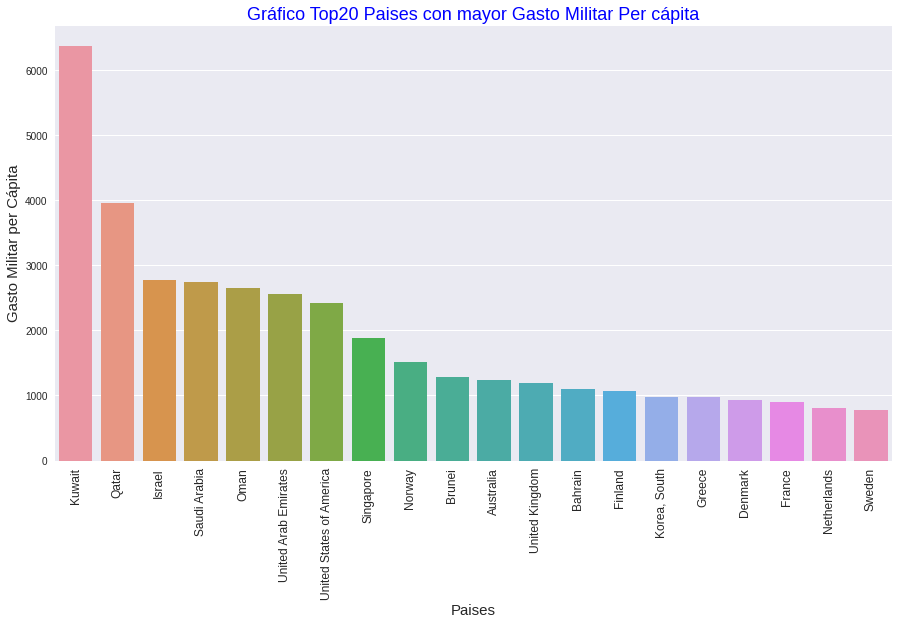

In [203]:
# Generamos un gráfico para hacer seguimiento visual a los datos trabajados en este primer análisis
fig, ax = plt.subplots(figsize = (15, 8))
sns.barplot(x = top20SPC.index, y = top20SPC.values);
plt.title('Gráfico Top20 Paises con mayor Gasto Militar Per cápita', size = 18, c = 'b')
plt.xticks(rotation = 90, size = 12);
plt.xlabel("Paises", size = 15)
plt.ylabel("Gasto Militar per Cápita", size = 15)
plt.show()

# **Conclusión 1:**

Como podemos ver este gasto en su mayoria esta centrado principalmente en paises del medio Oriente como Kuwait, Qatar, Israel, Arabia Saudita, Oman, Los Emiratos Arabes Unidos y luego seguidos por Estados Unidos de América.

Esto me lleva a concluir que quizas estos paises han realizado un mayor gasto por habitante en algún momento de su historia y por ello vemos esta referencia de su liderazgo en esta gráfica pero esto no se traduce en que hoy por hoy sean los paises con los ejercitos más poderosos a nivel mundial, al menos en primera instancia.

Por que algunos de los paises que vemos en la gráfica si cargan ese titulo en la actualidad, como evidentemente Estados Unidos, Reino Unido, Corea del Sur y Francia.



---





# **2) 2do Análisis**

A continuación quiero identificar cuales son los 10 paises que han realizado mayor gasto en componente militar. Que para el caso de este dataset el ultimo registro por año seria el año 2021.


In [187]:
df.columns

Index(['Year', 'Country', 'Spending (2020 USD)', 'Percent of GDP',
       'Percent of Government Spending', 'Spending per Capita'],
      dtype='object')

In [188]:
Year_filter = df['Year'] == 2021
top10_military_spending = df.loc[Year_filter, :].groupby(['Country'])['Spending (2020 USD)'].max().sort_values(ascending = False).round(2).head(10)
top10_military_spending

Country
United States of America    767780.13
China                       270016.55
India                        73574.66
Russia                       63485.06
United Kingdom               62489.28
Japan                        55773.52
Saudi Arabia                 53759.06
France                       53559.59
Germany                      52487.68
Korea, South                 47676.29
Name: Spending (2020 USD), dtype: float64

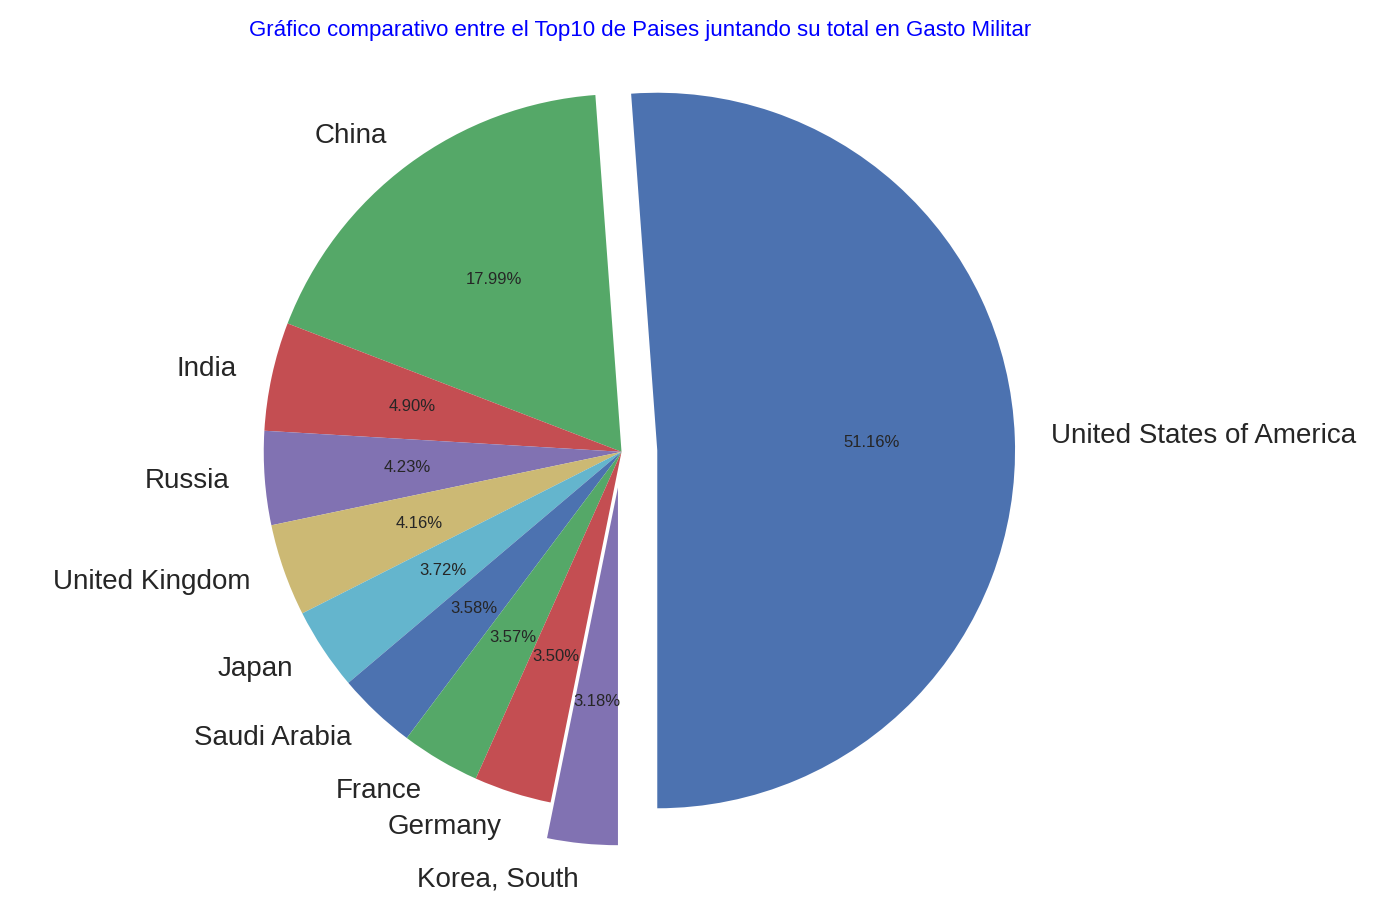

In [205]:
#Gráfico de torta; cortes ordenados y gráficados contra reloj.

# Creo variables para etiquetas y datos mediante listas
size = np.array(top10_military_spending.values)
etiquetas = np.array(top10_military_spending.index)
explotar = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0.1] # Lo utilizo para resaltar alguna porción del Gráfico. El valor es cuanto se separa de la torta.

# Creating plot
fig1 = plt.figure(dpi=200)
ax1 = fig1.add_subplot(1,1,1)
ax1.set_title("Gráfico comparativo entre el Top10 de Paises juntando su total en Gasto Militar", fontsize = 8, color = 'b')

def absolute_value(val):
    a  = np.round(val/100.*size.sum(), 0)
    return a

wedges, texts, autotexts = ax1.pie(size, labels=etiquetas, explode=explotar, autopct='%.2f%%', shadow = False, startangle=-90, rotatelabels= False)
# %.2f%% Me permite generar formato de decimal, viene del lenguaje C.

plt.setp(autotexts, size = 6, )
ax1.axis("equal") # Me permite proporcionar igualitariamente, vale decir, suma de porcentajes 100% (círculo).
plt.show()

# **Conclusión 2:**

La finalidad de este gráfico es identificar la fuerza de inversión entre la sumatoria de los 10 países que más destinaron recursos en gasto militar en su respectivo país durante el año 2021.

Como vemos, Estados Unidos de América encabeza esta lista, representando el 51.16% del total de gasto entre estos 10 países, que son las potencias que lideran esta lista de gastos. Después de Estados Unidos de América, China sigue en su escalada de gastos detrás de la primera potencia mundial. En lista de esos 5 países más importantes, referente a este gasto, lo cierran India, Rusia y Reino Unido.

Lo anterior nos permite afirmar que Estados Unidos fue el país que más gasto en recursos militares en el año 2021, tiene mucho sentido gracias a su status de potencia líder a nivel mundial.

También el gráfico nos da una muestra que actualmente estos 10 países serian los que podríamos considerar como entre los Países con los ejércitos más poderosos en el mundo.



---

# **3) 3er Análisis**

Finalmente, quisiera tener un acercamiento sobre el comportamiento del gasto militar desde un involucramiento en el cambio de las políticas de defensa del país Estados Unidos de América a raíz de los ataques del 11/S ocurridos en el año 2021.




In [190]:
# Generamos filtro agrupando las columnas con valores que coincican con el Pais United States of America y la información entre 2000 y 2021
Spending_USA_filter = (df['Country'] == 'United States of America') & (df['Year'] >= 2000) & (df['Year'] <= 2021)

In [191]:
# Generamos un DataFrame con la información filtrada y organizada por valores de menor a mayor por Año
df.loc[Spending_USA_filter, :].groupby('Year').max().round(2)

,Country,Spending (2020 USD),Percent of GDP,Percent of Government Spending,Spending per Capita
Year,,,,,
2001,United States of America,484986.81,0.03,0.10,1165.83
2002,United States of America,544547.53,0.03,0.10,1317.41
2003,United States of America,619785.02,0.04,0.11,1520.04
2004,United States of America,675516.16,0.04,0.12,1686.30
2005,United States of America,706629.69,0.04,0.12,1807.50
2006,United States of America,716812.03,0.04,0.12,1875.12
2007,United States of America,735939.34,0.04,0.12,1961.31
2008,United States of America,789474.28,0.04,0.12,2165.31
2009,United States of America,851597.64,0.05,0.12,2304.60


In [192]:
# Simplificamos el DataFrame anterior solo a las columnas que necesitamos que serian Year y Spending (2020 USD)
Spending_Militar_USA = df.loc[Spending_USA_filter, :].groupby('Year')[['Spending (2020 USD)']].max()
Spending_Militar_USA

,Spending (2020 USD)
Year,
2001,484986.806356
2002,544547.527345
2003,619785.017714
2004,675516.158350
2005,706629.693195
2006,716812.034596
2007,735939.336309
2008,789474.281884
2009,851597.637423


In [193]:
# Convertimos los index del dataframe resumido para usarlos en una variable que se asignara como el eje X del gráfico
SpendingMilitarYears = list(Spending_Militar_USA.index)
SpendingMilitarYears

[2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [194]:
# Convertimos los values del dataframe resumido para usarlos en una variable que se asignara como el eje Y del gráfico
SpendingMilitarValues = list(Spending_Militar_USA.values)
SpendingMilitarValues

[array([484986.80635573]),
 array([544547.52734516]),
 array([619785.01771425]),
 array([675516.15835041]),
 array([706629.69319479]),
 array([716812.03459551]),
 array([735939.33630882]),
 array([789474.28188402]),
 array([851597.63742307]),
 array([875941.8361648]),
 array([865569.73529584]),
 array([817491.83448531]),
 array([754611.31041161]),
 array([708193.55236033]),
 array([692111.48709798]),
 array([689987.69833406]),
 array([682878.44367916]),
 array([703431.25724296]),
 array([743402.8542328]),
 array([778397.2]),
 array([767780.1340955])]

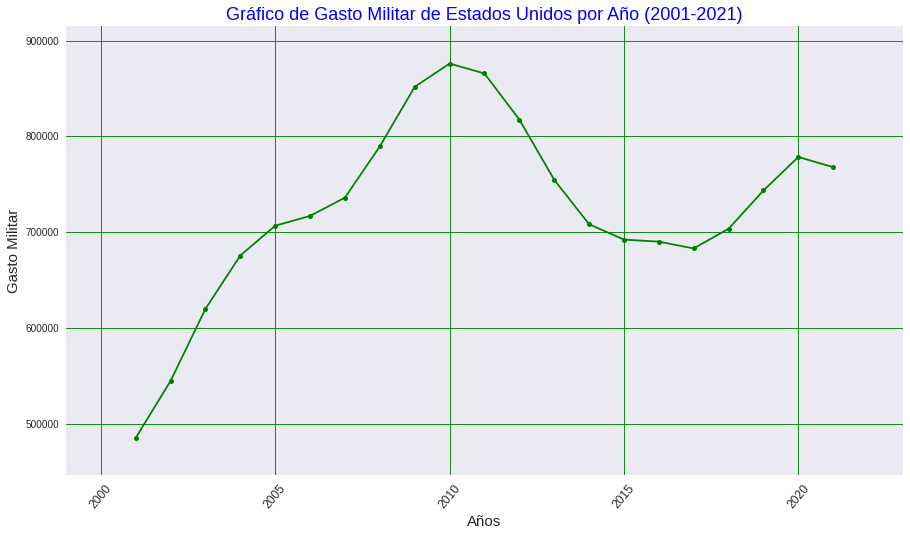

In [196]:
# Se crea grafico de tipo Plot para visualizar el comparativo de Gasto Militar de dicho Pais por Año entre 2000 y 2021
fig, ax = plt.subplots(figsize = (15, 8))
plt.style.use('seaborn')
plt.plot(SpendingMilitarYears, SpendingMilitarValues, c = 'green', marker = '.', markersize = 10)
plt.xlabel("Años", size = 15)
plt.xticks(rotation = 50, size = 12)
plt.ylabel("Gasto Militar", size = 15)
plt.title('Gráfico de Gasto Militar de Estados Unidos por Año (2001-2021)', size = 18, c = 'b')
plt.ticklabel_format(useOffset = False, style = 'plain')
plt.grid(c = 'g', 
         alpha = .9,
         linestyle = '-')
plt.margins(0.1)
plt.subplots_adjust(bottom=0.1)

# **Conclusión 3:**

En el anterior gráfico podemos evidenciar como hubo una progresión constante de gasto militar en Estados Unidos luego del ataque del 11-S que ocurrió en el año 2001, esta constante de gasto se mantuvo hasta el año 2010.

A partir de allí hubo una desaceleración, se redujo el gasto de  875.9B hasta el nivel de $682.8 B en el año 2017. De ese punto ha vuelto a incrementar gradualmente su gasto hasta el 2021, pero sin superar su último pico del año 2021.

Esto nos permite ver que el País cada vez más se armó para enfrentar todos los conflictos post ataque en Afganistán, Irak, Siria y se siguió armando para generar disuasión en todas las demás zonas donde tiene inherencia por su estatus de potencial mundial. Lo que lo conlleva hoy a preservar el rótulo del ejército más poderoso del mundo por su capacidad de gasto frente todos los demás países que son potencias.

 


---

